In [1]:
import pandas as pd

df_train = pd.read_csv('../data/manual/train_set.csv')
df_test = pd.read_csv('../data/manual/test_set.csv')

X_train = df_train.drop(columns=['Cs'])
y_train = df_train['Cs']
X_test = df_test.drop(columns=['Cs'])
y_test = df_test['Cs']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(440, 19) (440,) (142, 19) (142,)


In [2]:
from scripts.train_model import optuna_xgb

optuna_xgb(X_train, y_train, n_trials=100, model_save_path="../models/best_xgb_manual.pkl")

[I 2025-03-12 16:31:58,882] A new study created in memory with name: no-name-628a4e91-5b74-4b7d-a8a3-18faf34d8365
[I 2025-03-12 16:31:59,707] Trial 0 finished with value: 0.8712342936415014 and parameters: {'learning_rate': 0.26090124048139046, 'subsample': 0.9867534461688049, 'gamma': 0.3297210321782825, 'max_depth': 18, 'min_child_weight': 2, 'reg_alpha': 0.6862964811116931, 'colsample_bytree': 0.5790135408485501, 'colsample_bylevel': 0.9100101800475136, 'colsample_bynode': 0.9653003851495395}. Best is trial 0 with value: 0.8712342936415014.
[I 2025-03-12 16:32:00,381] Trial 1 finished with value: 0.9357352717172717 and parameters: {'learning_rate': 0.22258323385189208, 'subsample': 0.5793992166165283, 'gamma': 0.24812698852841908, 'max_depth': 11, 'min_child_weight': 9, 'reg_alpha': 0.4789140320440941, 'colsample_bytree': 0.622220389487487, 'colsample_bylevel': 0.9366555060093975, 'colsample_bynode': 0.90111062027846}. Best is trial 0 with value: 0.8712342936415014.
[I 2025-03-12 16

Best trial:
  Value: 0.7213958764263009
  Params:
    learning_rate: 0.15012625261354373
    subsample: 0.9664529730008192
    gamma: 0.3995386171300417
    max_depth: 18
    min_child_weight: 2
    reg_alpha: 0.8548737951278453
    colsample_bytree: 0.6043042401946199
    colsample_bylevel: 0.8403826738361106
    colsample_bynode: 0.5542463750752696
Best model saved to: ../models/best_xgb_manual.pkl


(<optuna.study.study.Study at 0x1b99c79e720>,
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8403826738361106,
              colsample_bynode=0.5542463750752696,
              colsample_bytree=0.6043042401946199, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3995386171300417,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15012625261354373,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...))

     model  R2_train  MAE_train  MAPE_train  RMSE_train  R2_test  MAE_test  \
0  XGBoost       1.0       2.82         1.2        5.65    0.322    203.39   

   MAPE_test  RMSE_test  
0      44.08     283.17  


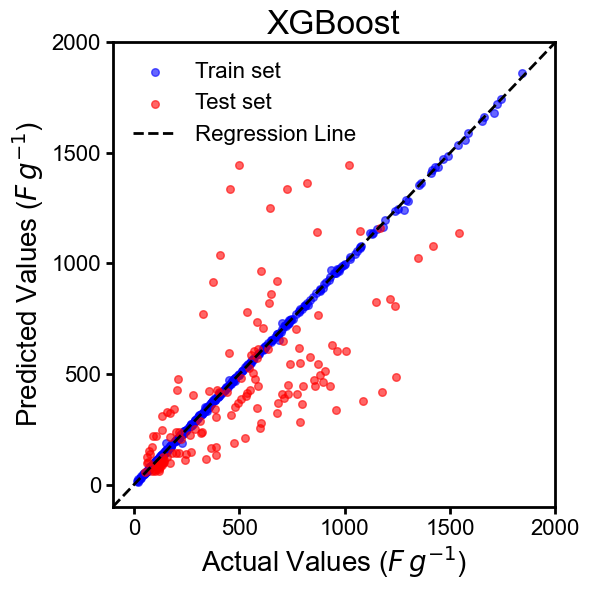

In [3]:
import joblib

# 加载最佳模型
best_model = joblib.load("../models/best_xgb_manual.pkl")

# 预测
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 评估
from scripts.evaluate_model import ModelEvaluator
evaluator = ModelEvaluator(model_name='XGBoost', y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_test_pred=y_test_pred)

df_metrics = evaluator.metrics_to_dataframe()
df_metrics.to_csv('../results/reports/metrics_XGBoost_manual.csv', index=False)
print(df_metrics)

figpath = '../results/figures/avp_XGBoost_manual.png'
evaluator.plot_actual_vs_predicted(figpath=figpath)